In [1]:
from tensorly.decomposition import parafac,non_negative_parafac,candecomp_parafac
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_test = pd.read_csv('./Testing Data/K036VRÁS-RS211.csv',index_col=0)
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.loc[df_test.OkPct >= 98]
df_test = df_test.loc[df_test.Flag == 524480]


In [2]:
x = df_test.loc[(df_test.CType == 4) & (df_test.Val > 0),:].Val
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape((-1,7,24))

In [3]:
(core_tesnor,loadings),errors = non_negative_parafac(X,
                                                     rank=3,
                                                     n_iter_max = 10000,
                                                     tol=1e-10,
                                                     return_errors=True,)
l_weeks,l_days,l_hours = loadings

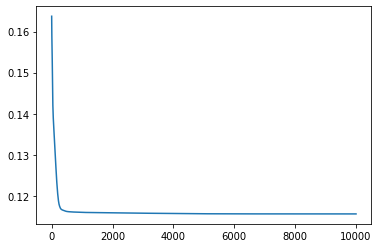

In [4]:
plt.plot(errors)

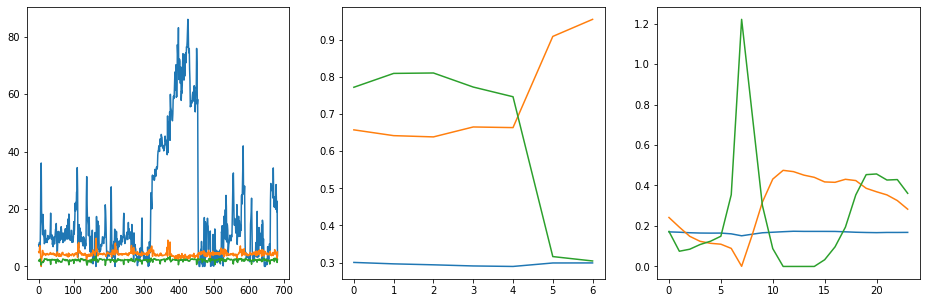

In [5]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_days)
ax[2].plot(l_hours)
plt.show()

# Custom implementation

In [9]:
import tensorly
print(tensorly.__file__)

C:\Users\Sverrir\Anaconda3\lib\site-packages\tensorly\__init__.py


In [6]:
from tensorly.decomposition.candecomp_parafac import non_negative_parafac_custom,parafac_custom

In [7]:
flat_factors = [(1,2),(2,2)]

In [8]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(X,
                                                            rank=3,
                                                            n_iter_max = 1000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                            normalize_factors=False)
l_weeks,l_days,l_hours = loadings

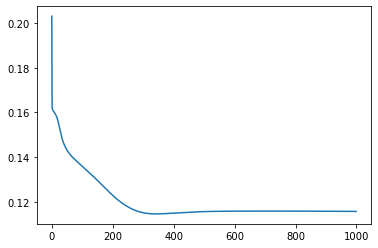

In [28]:
plt.plot(errors)

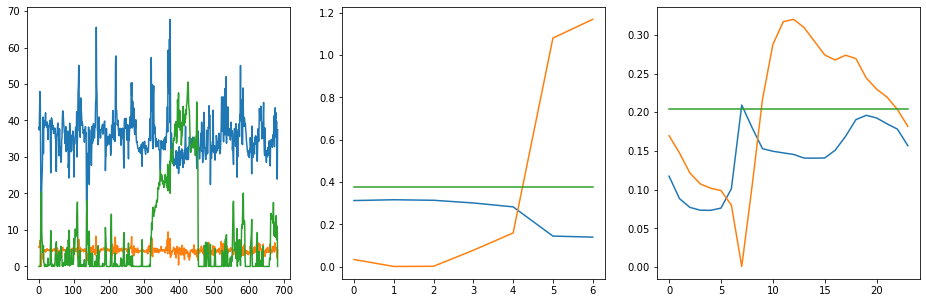

In [29]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_days)
ax[2].plot(l_hours)
plt.show()

In [30]:
for i in loadings:
    print(np.linalg.norm(i,axis=0))

[941.55226208 116.90654989 387.71963371]
[0.71301395 1.60212279 1.        ]
[0.72960533 1.07572846 1.        ]


In [31]:
flat_factors = [(1,0),(2,0)]

In [38]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(X,
                                                            rank=4,
                                                            n_iter_max = 10000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                            normalize_factors=False)
l_weeks,l_days,l_hours = loadings

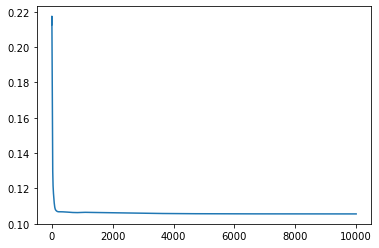

In [39]:
plt.plot(errors)

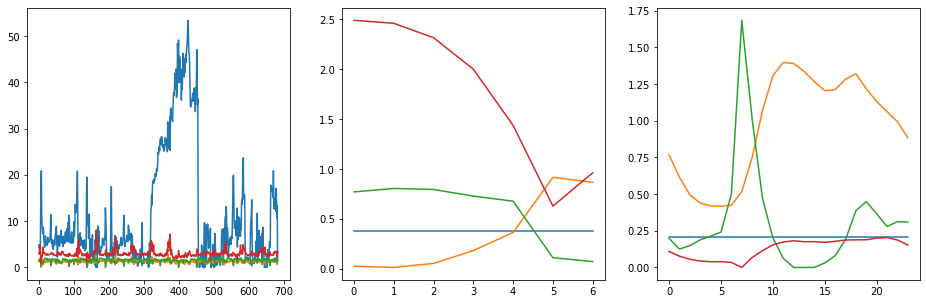

In [40]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_days)
ax[2].plot(l_hours)
plt.show()

In [3]:
(core_tesnor,loadings),errors = non_negative_parafac(X.reshape(-1,7*24),
                                                     rank=3,
                                                     n_iter_max = 10000,
                                                     tol=1e-10,
                                                     return_errors=True,)


ValueError: not enough values to unpack (expected 3, got 2)

In [4]:
l_weeks,l_weekhours = loadings

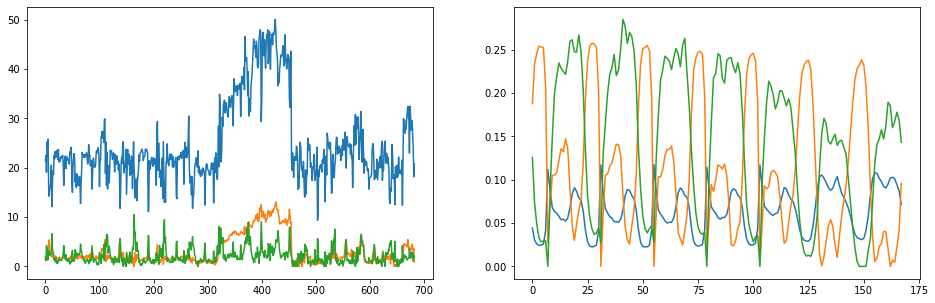

In [5]:
f,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_weekhours)
plt.show()

In [8]:
(core_tesnor,loadings),errors = non_negative_parafac_custom(X.reshape(-1,24*7),
                                                            rank=3,
                                                            n_iter_max = 10000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = [(1,0)],
                                                            normalize_factors=False)
l_weeks,l_weekhours = loadings

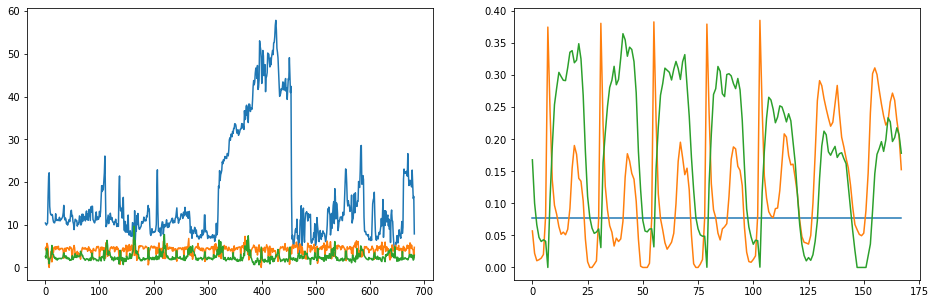

In [9]:
f,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_weekhours)
plt.show()